# recreating HGTDB

G+C content, 
codon usage, 
or amino acid compositio

**GC content:**

- We considered genes as extraneous in terms of the G+C content if their G+C(T) content deviated by >1.5sigma from the mean value of their genome or 
- if deviations of G+C(1) and G+C(3) were of the same sign and at least one was >1.5sigma

**Codon Usage:**
- Mahalonobis distance is used as a measure of the distance between the codon usage of a gene (X) and the mean of an organism

- each gene is a vector of 61-D space; rel freq of 61 codons (stop codons not included)

- Mahalonobis distance defined as 
    - dM(X,Xhat) = (X-Xhat)^T * S^-1 * (X-Xhat)

- The covariance S is a 61 X 61 covriance
matrix
    - Sij = sigma( (Xki - Xhati) * (Xkj - Xhatj)  )

- Xhat is mean value for each codon!

important part is 

"We calculated the Mahalanobis distance from each gene to the mean value of its own organism. These distances did not follow a normal distribution, so we could not apply the criteria regarding deviations >1.5 from the mean value to identify extraneous genes from codon usage. Instead we used a Montecarlo procedure"

- generating a random sample of 10,000 sequences from the means and standard deviations of the codon usage of each genome

- The Mahalanobis distances of these sets of random sequences had a normal distribution, and so, we could calculate a mean value and a standard deviation

**Amino acid:**

What large deviations from the mean values of amino acid composition represent is very ambiguous. They may be caused either by functional constraints or by the result of the extraneous codon usage or G+C content of a horizontally transferred gene. We therefore chose the restricting criterion:

We excluded from our set of genes predicted as being acquired by HGT those isolated genes whose derived protein has deviations of >3signa in at least one amino acid content. Only genes included in some of the alien genomic strips could present such deviation.

In [ ]:
from data.utils.NCBI.data_loader import NCBIDataLoader
# from data.utils.HGTREE.data_loader import HGTREEDataLoader
# test out combination

aquifex_aeolicus_VF5 = NCBIDataLoader('AE000657')

: 

In [2]:
len(aquifex_aeolicus_VF5)

1553

# GC content deviation

## Part 1
We considered genes as extraneous in terms of the G+C content if their G+C(T) content deviated by >1.5 from the mean value of their genome or if deviations of G+C(1) and G+C(3) were of the same sign and at least one was >1.5

In [3]:
aquifex_aeolicus_VF5.print_genome_summary()

Mean GC Content-> T:43.34303486743043, 1:50.13798736996561, 2:32.20957374710352, 3:47.681543485221965
Std GC content-> T:3.781751997458822, 1:5.145355530842554, 2:4.714476507774925, 3:6.409771046128724
Relative nucleotide frequency: {'G': 0.2430156486938153, 'A': 0.326311309497143, 'C': 0.1927896813922138, 'T': 0.23788336041682787}
Nucleotide Identity: {'A': [0.32453764605741703, 0.34840166655127336, 0.30599461588273863], 'T': [0.17104143163759433, 0.327946500934686, 0.2146621486782033], 'G': [0.34403776212953646, 0.15032764919340058, 0.2346815347585089], 'C': [0.16038316017545218, 0.17332418332064006, 0.24466170068054915]}
Dinucleotide Identity: {'AA': [0.1301107368746869, 0.1168316791359347, 0.12895638733956052], 'AG': [0.06074237283993859, 0.09573709868573779, 0.10245319942248912], 'AT': [0.09167253815107296, 0.03736911341264249, 0.027861438116125303], 'AC': [0.04201199819171856, 0.09846377531695834, 0.04672217776175844], 'TA': [0.04333359127137661, 0.09658218516964856, 0.0530980119

In [4]:
# gene - genome
print(" Check if gene.GCT - genome.GCT deviates more than 1.5sigma")
print(f" GCT: {abs(aquifex_aeolicus_VF5['aq_171']['GCT'] - aquifex_aeolicus_VF5.mean_GCT)}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GCT}")
print("\n")
print(" Check if either gene.GC1 - genome.GC1 and gene.GC3 - genome.GC3 has same sign")
print( " AND at least one of them is more than 1.5sigma")
print(f" GC1: {abs(aquifex_aeolicus_VF5['aq_171']['GC1'] - aquifex_aeolicus_VF5.mean_GC1)}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GC1}")
print(f" GC3: {abs(aquifex_aeolicus_VF5['aq_171']['GC3'] - aquifex_aeolicus_VF5.mean_GC3)}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GC3}")



 Check if gene.GCT - genome.GCT deviates more than 1.5sigma
 GCT: 7.310646203462824  > 1.5sigma: 5.672627996188233


 Check if either gene.GC1 - genome.GC1 and gene.GC3 - genome.GC3 has same sign
 AND at least one of them is more than 1.5sigma
 GC1: 6.818149313285446  > 1.5sigma: 7.718033296263831
 GC3: 7.195713525707795  > 1.5sigma: 9.614656569193086


let us loop this damn thing

27.09.2023 -> added absolute sign... important

https://en.wikipedia.org/wiki/Standard_deviation

In [5]:
# need to rethink gene listing i guess

list_of_extraneous_genes = []
for i in aquifex_aeolicus_VF5.genes:
    dev_GCT = aquifex_aeolicus_VF5[i]['GCT'] - aquifex_aeolicus_VF5.mean_GCT
    
    dev_GC1 = aquifex_aeolicus_VF5[i]['GC1'] - aquifex_aeolicus_VF5.mean_GC1
    dev_GC3 = aquifex_aeolicus_VF5[i]['GC3'] - aquifex_aeolicus_VF5.mean_GC3
    equal_sign_check = dev_GC1*dev_GC3
    
    if len(aquifex_aeolicus_VF5[i]['sequence']) > 300:
        if abs(dev_GCT) > (1.5*aquifex_aeolicus_VF5.std_GCT):
            #print(f'HGT found at {i}')
            list_of_extraneous_genes.append(i)
        elif (equal_sign_check > 0):
            if abs(dev_GC1) > (1.5*aquifex_aeolicus_VF5.std_GC1):
                #print(f'HGT found at {i}')
                list_of_extraneous_genes.append(i)
            elif abs(dev_GC3) > (1.5*aquifex_aeolicus_VF5.std_GC3):
                #print(f'HGT found at {i}')
                list_of_extraneous_genes.append(i)
            else:
                pass
        else:
            pass
        
                

In [6]:
len(list_of_extraneous_genes)

243

In [7]:
list_of_extraneous_genes

['aq_005',
 'aq_013',
 'aq_018',
 'aq_032',
 'aq_035',
 'aq_050',
 'aq_059',
 'aq_062',
 'aq_081',
 'aq_082',
 'aq_118',
 'aq_125',
 'aq_132',
 'aq_141',
 'aq_156',
 'aq_171',
 'aq_172',
 'aq_182',
 'aq_183',
 'aq_200',
 'aq_220',
 'aq_221',
 'aq_254',
 'aq_255',
 'aq_264',
 'aq_293',
 'aq_326',
 'aq_340',
 'aq_351',
 'aq_359',
 'aq_369',
 'aq_372',
 'aq_376',
 'aq_377',
 'aq_378',
 'aq_380',
 'aq_381',
 'aq_382',
 'aq_383',
 'aq_384',
 'aq_385',
 'aq_386',
 'aq_387',
 'aq_388',
 'aq_402',
 'aq_407',
 'aq_418',
 'aq_434',
 'aq_451',
 'aq_465',
 'aq_473',
 'aq_476',
 'aq_488',
 'aq_503',
 'aq_504',
 'aq_505',
 'aq_506',
 'aq_507',
 'aq_509',
 'aq_510',
 'aq_511',
 'aq_515',
 'aq_516',
 'aq_518',
 'aq_519',
 'aq_520',
 'aq_522',
 'aq_531',
 'aq_558',
 'aq_573',
 'aq_585',
 'aq_599',
 'aq_626',
 'aq_629',
 'aq_645',
 'aq_647',
 'aq_652',
 'aq_662',
 'aq_666',
 'aq_673',
 'aq_678',
 'aq_706',
 'aq_711',
 'aq_734',
 'aq_737',
 'aq_740',
 'aq_771',
 'aq_780',
 'aq_782',
 'aq_812',
 'aq_820',

In [8]:
print(" Check if gene.GCT - genome.GCT deviates more than 1.5sigma")
print(f" GCT: {aquifex_aeolicus_VF5['aq_005']['GCT'] - aquifex_aeolicus_VF5.mean_GCT}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GCT}")
print("\n")
print(" Check if either gene.GC1 - genome.GC1 and gene.GC3 - genome.GC3 has same sign")
print( " AND at least one of them is more than 1.5sigma")
print(f" GC1: {aquifex_aeolicus_VF5['aq_005']['GC1'] - aquifex_aeolicus_VF5.mean_GC1}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GC1}")
print(f" GC3: {aquifex_aeolicus_VF5['aq_005']['GC3'] - aquifex_aeolicus_VF5.mean_GC3}  > 1.5sigma: {1.5*aquifex_aeolicus_VF5.std_GC3}")

 Check if gene.GCT - genome.GCT deviates more than 1.5sigma
 GCT: 6.246456101370882  > 1.5sigma: 5.672627996188233


 Check if either gene.GC1 - genome.GC1 and gene.GC3 - genome.GC3 has same sign
 AND at least one of them is more than 1.5sigma
 GC1: 11.930978147275773  > 1.5sigma: 7.718033296263831
 GC3: 2.3184565147780347  > 1.5sigma: 9.614656569193086


## Part 2
We also ran an 11-gene window through each genome. Five or more extraneous genes in a given window indicated the presence of an alien genomic strip. Finally, we filtered these strips to disregard short isolated segments and to include genes that we did not consider extraneous but that had a deviation of their G+C content of the same sign as the deviation of the strip to which they belong

In [9]:
from Bio.SeqUtils import GC123

In [10]:
list_of_genes = list(aquifex_aeolicus_VF5.genes.keys())

genomic_strips = []


for k in range(len(list_of_genes)-10):
    window = {}
    j = 0
    while j < 11:
        # get window
        locust_tag = list_of_genes[k + j]
        
        # take genes that are more than 300bp
        if len(aquifex_aeolicus_VF5[locust_tag]['sequence'])>300:
            data = aquifex_aeolicus_VF5[locust_tag]
            window[locust_tag] = data
        # iterate        
        j+=1
        
    # count total extraneous genes in window
    extraneous_counter = 0
    for l in window.keys():
        if l in list_of_extraneous_genes:
            extraneous_counter+=1
    
    # check windows with more than or
    # equal to 5 extraneous genes
    if extraneous_counter >=5:
        # add their sequences together
        sequences = ''
        for m in window.keys():
            sequences += window[m]['sequence']
        
        # get standard deviation of strip
        GCT, GC1, GC2, GC3 = GC123(sequences)
        SDT = (GCT - aquifex_aeolicus_VF5.mean_GCT)/aquifex_aeolicus_VF5.std_GCT
        SD1 = (GC1- aquifex_aeolicus_VF5.mean_GC1)/aquifex_aeolicus_VF5.std_GC1
        SD2 = (GC2 - aquifex_aeolicus_VF5.mean_GC2)/aquifex_aeolicus_VF5.std_GC2
        SD3 = (GC3 - aquifex_aeolicus_VF5.mean_GC3)/aquifex_aeolicus_VF5.std_GC3
        
        # tag genes as extraneous if they have equal deviation to the its strip
        for n in window.keys():
            # check only genes not in current list
            if n not in list_of_extraneous_genes:
                check_SDT = window[n]['SDT']*SDT
                check_SD1 = window[n]['SD1']*SD1
                check_SD2 = window[n]['SD2']*SD2
                check_SD3 = window[n]['SD3']*SD3
                
                if (check_SDT > 0) and (check_SD1 > 0) and (check_SD2 > 0) and (check_SD3 > 0):
                    list_of_extraneous_genes.append(n)
            
        
        genomic_strips.append(window)


In [11]:
# the 10s are windows that had bp<300
for i in genomic_strips:
    print(len(i))

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


In [12]:
len(genomic_strips)

101

In [13]:
genomic_strips[0].keys()

dict_keys(['aq_365', 'aq_367', 'aq_369', 'aq_370', 'aq_371', 'aq_372', 'aq_373', 'aq_374', 'aq_376', 'aq_377', 'aq_378'])

In [14]:
genomic_strips[1].keys()

dict_keys(['aq_367', 'aq_369', 'aq_370', 'aq_371', 'aq_372', 'aq_373', 'aq_374', 'aq_376', 'aq_377', 'aq_378', 'aq_380'])

In [15]:
len(list_of_extraneous_genes)

261

In [16]:
len(list_of_genes)

1553

In [17]:
for i in list_of_extraneous_genes:
    print(i)

aq_005
aq_013
aq_018
aq_032
aq_035
aq_050
aq_059
aq_062
aq_081
aq_082
aq_118
aq_125
aq_132
aq_141
aq_156
aq_171
aq_172
aq_182
aq_183
aq_200
aq_220
aq_221
aq_254
aq_255
aq_264
aq_293
aq_326
aq_340
aq_351
aq_359
aq_369
aq_372
aq_376
aq_377
aq_378
aq_380
aq_381
aq_382
aq_383
aq_384
aq_385
aq_386
aq_387
aq_388
aq_402
aq_407
aq_418
aq_434
aq_451
aq_465
aq_473
aq_476
aq_488
aq_503
aq_504
aq_505
aq_506
aq_507
aq_509
aq_510
aq_511
aq_515
aq_516
aq_518
aq_519
aq_520
aq_522
aq_531
aq_558
aq_573
aq_585
aq_599
aq_626
aq_629
aq_645
aq_647
aq_652
aq_662
aq_666
aq_673
aq_678
aq_706
aq_711
aq_734
aq_737
aq_740
aq_771
aq_780
aq_782
aq_812
aq_820
aq_821
aq_833
aq_837
aq_850
aq_862
aq_895
aq_908
aq_917
aq_920
aq_926
aq_940
aq_944
aq_946
aq_950
aq_993
aq_996
aq_1008
aq_1012
aq_1017
aq_1018
aq_1019
aq_1029
aq_1030
aq_1031
aq_1033
aq_1035
aq_1037
aq_1038
aq_1049
aq_1051
aq_1052
aq_1053
aq_1057
aq_1070
aq_1073
aq_1078
aq_1079
aq_1080
aq_1095
aq_1096
aq_1097
aq_1105
aq_1108
aq_1133
aq_1177
aq_1186
aq_1188
aq_

## Putting part 1 and 2 together


In [18]:
def GC_Content_Deviation(genome, return_genomic_strips = False):
    # Init list of extraneous genes
    list_of_extraneous_genes = []
    
    # part 1: GCT, GC1, GC3 deviation
    for gene in genome.genes:
        dev_GCT = genome[gene]['GCT'] - genome.mean_GCT
        
        dev_GC1 = genome[gene]['GC1'] - genome.mean_GC1
        dev_GC3 = genome[gene]['GC3'] - genome.mean_GC3
        equal_sign_check = dev_GC1*dev_GC3
        
        # consider only more than 300bp
        # either gct > 1.5
        # or sign gc1 and gc3 equal and one of is > 1.5
        if len(genome[gene]['sequence']) > 300:
            if abs(dev_GCT) > (1.5*genome.std_GCT):
                #print(f'HGT found at {i}')
                list_of_extraneous_genes.append(gene)
            elif (equal_sign_check > 0):
                if abs(dev_GC1) > (1.5*genome.std_GC1):
                    #print(f'HGT found at {i}')
                    list_of_extraneous_genes.append(gene)
                elif abs(dev_GC3) > (1.5*genome.std_GC3):
                    #print(f'HGT found at {i}')
                    list_of_extraneous_genes.append(gene)
                else:
                    pass
            else:
                pass
    
    # part two: 11 genes window
    list_of_genes = list(genome.genes.keys())
    genomic_strips = []
    
    for k in range(len(list_of_genes)-10):
        window = {}
        j = 0
        while j < 11:
            # get window
            locust_tag = list_of_genes[k + j]
            
            # take genes that are more than 300bp
            if len(genome[locust_tag]['sequence'])>300:
                data = genome[locust_tag]
                window[locust_tag] = data
            # iterate        
            j+=1
            
        # count total extraneous genes in window
        extraneous_counter = 0
        for l in window.keys():
            if l in list_of_extraneous_genes:
                extraneous_counter+=1
        
        # check windows with more than or
        # equal to 5 extraneous genes
        if extraneous_counter >=5:
            # add their sequences together
            window_sequences = ''
            for m in window.keys():
                window_sequences += window[m]['sequence']
            
            # get standard deviation of strip
            GCT, GC1, GC2, GC3 = GC123(window_sequences)
            SDT = (GCT - genome.mean_GCT)/genome.std_GCT
            SD1 = (GC1- genome.mean_GC1)/genome.std_GC1
            SD2 = (GC2 - genome.mean_GC2)/genome.std_GC2
            SD3 = (GC3 - genome.mean_GC3)/genome.std_GC3
            
            # tag genes as extraneous if they have equal deviation to the its strip
            for n in window.keys():
                # check only genes not in current list
                if n not in list_of_extraneous_genes:
                    check_SDT = window[n]['SDT']*SDT
                    check_SD1 = window[n]['SD1']*SD1
                    check_SD2 = window[n]['SD2']*SD2
                    check_SD3 = window[n]['SD3']*SD3
                    
                    if (check_SDT > 0) and (check_SD1 > 0) and (check_SD2 > 0) and (check_SD3 > 0):
                        list_of_extraneous_genes.append(n)
                
            
            genomic_strips.append(window)
    
    if return_genomic_strips:
        return list_of_extraneous_genes, genomic_strips
    else:
        return list_of_extraneous_genes

In [19]:
hgt_candidates=GC_Content_Deviation(aquifex_aeolicus_VF5)
print(len(hgt_candidates))
print(hgt_candidates)

261
['aq_005', 'aq_013', 'aq_018', 'aq_032', 'aq_035', 'aq_050', 'aq_059', 'aq_062', 'aq_081', 'aq_082', 'aq_118', 'aq_125', 'aq_132', 'aq_141', 'aq_156', 'aq_171', 'aq_172', 'aq_182', 'aq_183', 'aq_200', 'aq_220', 'aq_221', 'aq_254', 'aq_255', 'aq_264', 'aq_293', 'aq_326', 'aq_340', 'aq_351', 'aq_359', 'aq_369', 'aq_372', 'aq_376', 'aq_377', 'aq_378', 'aq_380', 'aq_381', 'aq_382', 'aq_383', 'aq_384', 'aq_385', 'aq_386', 'aq_387', 'aq_388', 'aq_402', 'aq_407', 'aq_418', 'aq_434', 'aq_451', 'aq_465', 'aq_473', 'aq_476', 'aq_488', 'aq_503', 'aq_504', 'aq_505', 'aq_506', 'aq_507', 'aq_509', 'aq_510', 'aq_511', 'aq_515', 'aq_516', 'aq_518', 'aq_519', 'aq_520', 'aq_522', 'aq_531', 'aq_558', 'aq_573', 'aq_585', 'aq_599', 'aq_626', 'aq_629', 'aq_645', 'aq_647', 'aq_652', 'aq_662', 'aq_666', 'aq_673', 'aq_678', 'aq_706', 'aq_711', 'aq_734', 'aq_737', 'aq_740', 'aq_771', 'aq_780', 'aq_782', 'aq_812', 'aq_820', 'aq_821', 'aq_833', 'aq_837', 'aq_850', 'aq_862', 'aq_895', 'aq_908', 'aq_917', 'aq_9

# Codon Usage

each gene corresponds to a vector or to a point in the 61-D space whose coordinates are the relative frequency of use of the 61 codons

I am confused as to the definition of relative synonymous codon usage vs relative frequency but here goes:

RSCU: 
- http://genomes.urv.es/CAIcal/tutorial.pdf
- this is also defined as RSCU = S × Nc/Na, where S represents the number of synonymous codons encoding the same amino acid, Nc is the frequency of the codon in the genome, and Na is the relative frequency of the codon for that amino acid (https://www.biostars.org/p/437939/)


relative frequency:
- https://www.biotite-python.org/examples/gallery/sequence/codon_usage.html
- "relative frequencies are calculated by dividing the total number of occurrences of each codon by the total number of occurrences of the respective amino acid"
- is just Nc/Na


Some setups

In [20]:
import numpy as np

they excluded stop codons

In [21]:
CODE_COVARMAT = {
    'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
    'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
    'tta': 'L', 'tca': 'S', 'ttg': 'L', 'tcg': 'S',
    'tgg': 'W', 'ctt': 'L', 'cct': 'P', 'cat': 'H',
    'cgt': 'R', 'ctc': 'L', 'ccc': 'P', 'cac': 'H',
    'cgc': 'R', 'cta': 'L', 'cca': 'P', 'caa': 'Q',
    'cga': 'R', 'ctg': 'L', 'ccg': 'P', 'cag': 'Q',
    'cgg': 'R', 'att': 'I', 'act': 'T', 'aat': 'N',
    'agt': 'S', 'atc': 'I', 'acc': 'T', 'aac': 'N',
    'agc': 'S', 'ata': 'I', 'aca': 'T', 'aaa': 'K',
    'aga': 'R', 'atg': 'M', 'acg': 'T', 'aag': 'K',
    'agg': 'R', 'gtt': 'V', 'gct': 'A', 'gat': 'D',
    'ggt': 'G', 'gtc': 'V', 'gcc': 'A', 'gac': 'D',
    'ggc': 'G', 'gta': 'V', 'gca': 'A', 'gaa': 'E',
    'gga': 'G', 'gtg': 'V', 'gcg': 'A', 'gag': 'E',
    'ggg': 'G'
}

In [22]:
len(CODE_COVARMAT)

61

## Calculating RSCU and Relative Frequnce Codon

In [23]:
RSCU_aq_171 = {}
RFC_aq_171 = {}
for cds in CODE_COVARMAT:
    RSCU_aq_171[cds.upper()]=0
    RFC_aq_171[cds.upper()]=0

single

In [24]:
aquifex_aeolicus_VF5['aq_171']['cub']['TTT']

9

In [25]:
aquifex_aeolicus_VF5['aq_171']['cub']['TTC']

5

RSCU and RFC

In [26]:
amino_acid = CODE_COVARMAT['ttt']
# get total amount of synonymous codon (S)
S = list(CODE_COVARMAT.values()).count(amino_acid)

# get total count of synonymous codn
Na = 0
for codon in CODE_COVARMAT:
    if CODE_COVARMAT[codon]==amino_acid:
        Na+= aquifex_aeolicus_VF5['aq_171']['cub'][codon.upper()]

Nc = aquifex_aeolicus_VF5['aq_171']['cub']['ttt'.upper()]
# numerator = aquifex_aeolicus_VF5['aq_171']['cub']['ttt'.upper()]
# denominator = (total_count / number_of_synonymous_codon)
if Na == 0:
    RFC = 0
else:
    RFC = (Nc / Na)
    
RSCU = S * RFC
if Na == 0:
    print(0)
else:
    print(RFC)
    print(RSCU)
    print(f"Synonymous S  {S}")
    print(f"freq of codon TTT Nc {Nc}")
    print(f"total freq of F {Na}")

0.6428571428571429
1.2857142857142858
Synonymous S  2
freq of codon TTT Nc 9
total freq of F 14


loop

In [27]:
for cds in CODE_COVARMAT:
    # check amino acid of current codon
    amino_acid = CODE_COVARMAT[cds]
    # get total amount of synonymous codon
    S = list(CODE_COVARMAT.values()).count(amino_acid)
    
    # get total count of synonymous codn
    Na = 0
    for codon in CODE_COVARMAT:
        if CODE_COVARMAT[codon]==amino_acid:
            Na+= aquifex_aeolicus_VF5['aq_171']['cub'][codon.upper()]
    
    Nc = aquifex_aeolicus_VF5['aq_171']['cub'][cds.upper()]
    
    if Nc == 0:
        RFC = float(0)
    else:
        RFC = (Nc / Na)
        
    RSCU = S * RFC

    RFC_aq_171[cds.upper()] = RFC
    RSCU_aq_171[cds.upper()] = RSCU

In [28]:
RSCU_aq_171

{'TTT': 1.2857142857142858,
 'TCT': 1.125,
 'TAT': 1.0,
 'TGT': 0.0,
 'TTC': 0.7142857142857143,
 'TCC': 1.5,
 'TAC': 1.0,
 'TGC': 2.0,
 'TTA': 1.3548387096774193,
 'TCA': 0.75,
 'TTG': 0.7741935483870968,
 'TCG': 1.125,
 'TGG': 0.0,
 'CTT': 1.741935483870968,
 'CCT': 1.3333333333333333,
 'CAT': 1.0,
 'CGT': 0.0,
 'CTC': 1.161290322580645,
 'CCC': 0.6666666666666666,
 'CAC': 1.0,
 'CGC': 0.0,
 'CTA': 0.1935483870967742,
 'CCA': 0.0,
 'CAA': 0.0,
 'CGA': 0.6000000000000001,
 'CTG': 0.7741935483870968,
 'CCG': 2.0,
 'CAG': 2.0,
 'CGG': 0.0,
 'ATT': 0.75,
 'ACT': 0.6666666666666666,
 'AAT': 0.5454545454545454,
 'AGT': 1.5,
 'ATC': 0.15000000000000002,
 'ACC': 0.0,
 'AAC': 1.4545454545454546,
 'AGC': 0.0,
 'ATA': 2.0999999999999996,
 'ACA': 1.3333333333333333,
 'AAA': 0.9032258064516129,
 'AGA': 2.4000000000000004,
 'ATG': 1.0,
 'ACG': 2.0,
 'AAG': 1.096774193548387,
 'AGG': 3.0,
 'GTT': 0.5714285714285714,
 'GCT': 2.0,
 'GAT': 1.1428571428571428,
 'GGT': 1.2307692307692308,
 'GTC': 0.0,
 

In [29]:
RFC_aq_171

{'TTT': 0.6428571428571429,
 'TCT': 0.1875,
 'TAT': 0.5,
 'TGT': 0.0,
 'TTC': 0.35714285714285715,
 'TCC': 0.25,
 'TAC': 0.5,
 'TGC': 1.0,
 'TTA': 0.22580645161290322,
 'TCA': 0.125,
 'TTG': 0.12903225806451613,
 'TCG': 0.1875,
 'TGG': 0.0,
 'CTT': 0.2903225806451613,
 'CCT': 0.3333333333333333,
 'CAT': 0.5,
 'CGT': 0.0,
 'CTC': 0.1935483870967742,
 'CCC': 0.16666666666666666,
 'CAC': 0.5,
 'CGC': 0.0,
 'CTA': 0.03225806451612903,
 'CCA': 0.0,
 'CAA': 0.0,
 'CGA': 0.1,
 'CTG': 0.12903225806451613,
 'CCG': 0.5,
 'CAG': 1.0,
 'CGG': 0.0,
 'ATT': 0.25,
 'ACT': 0.16666666666666666,
 'AAT': 0.2727272727272727,
 'AGT': 0.25,
 'ATC': 0.05,
 'ACC': 0.0,
 'AAC': 0.7272727272727273,
 'AGC': 0.0,
 'ATA': 0.7,
 'ACA': 0.3333333333333333,
 'AAA': 0.45161290322580644,
 'AGA': 0.4,
 'ATG': 1.0,
 'ACG': 0.5,
 'AAG': 0.5483870967741935,
 'AGG': 0.5,
 'GTT': 0.14285714285714285,
 'GCT': 0.5,
 'GAT': 0.5714285714285714,
 'GGT': 0.3076923076923077,
 'GTC': 0.0,
 'GCC': 0.0,
 'GAC': 0.42857142857142855,
 '

In [30]:
aquifex_aeolicus_VF5['aq_171']['RSCU']

{'TTT': 1.2857142857142858,
 'TCT': 1.125,
 'TAT': 1.0,
 'TGT': 0.0,
 'TTC': 0.7142857142857143,
 'TCC': 1.5,
 'TAC': 1.0,
 'TGC': 2.0,
 'TTA': 1.3548387096774193,
 'TCA': 0.75,
 'TAA': 0.0,
 'TGA': 0.0,
 'TTG': 0.7741935483870968,
 'TCG': 1.125,
 'TAG': 3.0,
 'TGG': 0,
 'CTT': 1.741935483870968,
 'CCT': 1.3333333333333333,
 'CAT': 1.0,
 'CGT': 0.0,
 'CTC': 1.161290322580645,
 'CCC': 0.6666666666666666,
 'CAC': 1.0,
 'CGC': 0.0,
 'CTA': 0.1935483870967742,
 'CCA': 0.0,
 'CAA': 0.0,
 'CGA': 0.6000000000000001,
 'CTG': 0.7741935483870968,
 'CCG': 2.0,
 'CAG': 2.0,
 'CGG': 0.0,
 'ATT': 0.75,
 'ACT': 0.6666666666666666,
 'AAT': 0.5454545454545454,
 'AGT': 1.5,
 'ATC': 0.15000000000000002,
 'ACC': 0.0,
 'AAC': 1.4545454545454546,
 'AGC': 0.0,
 'ATA': 2.0999999999999996,
 'ACA': 1.3333333333333333,
 'AAA': 0.9032258064516129,
 'AGA': 2.4000000000000004,
 'ATG': 1.0,
 'ACG': 2.0,
 'AAG': 1.096774193548387,
 'AGG': 3.0,
 'GTT': 0.5714285714285714,
 'GCT': 2.0,
 'GAT': 1.1428571428571428,
 'GGT

In [31]:
aquifex_aeolicus_VF5['aq_171']['RFC']

{'TTT': 0.6428571428571429,
 'TCT': 0.1875,
 'TAT': 0.5,
 'TGT': 0.0,
 'TTC': 0.35714285714285715,
 'TCC': 0.25,
 'TAC': 0.5,
 'TGC': 1.0,
 'TTA': 0.22580645161290322,
 'TCA': 0.125,
 'TAA': 0.0,
 'TGA': 0.0,
 'TTG': 0.12903225806451613,
 'TCG': 0.1875,
 'TAG': 1.0,
 'TGG': 0,
 'CTT': 0.2903225806451613,
 'CCT': 0.3333333333333333,
 'CAT': 0.5,
 'CGT': 0.0,
 'CTC': 0.1935483870967742,
 'CCC': 0.16666666666666666,
 'CAC': 0.5,
 'CGC': 0.0,
 'CTA': 0.03225806451612903,
 'CCA': 0.0,
 'CAA': 0.0,
 'CGA': 0.1,
 'CTG': 0.12903225806451613,
 'CCG': 0.5,
 'CAG': 1.0,
 'CGG': 0.0,
 'ATT': 0.25,
 'ACT': 0.16666666666666666,
 'AAT': 0.2727272727272727,
 'AGT': 0.25,
 'ATC': 0.05,
 'ACC': 0.0,
 'AAC': 0.7272727272727273,
 'AGC': 0.0,
 'ATA': 0.7,
 'ACA': 0.3333333333333333,
 'AAA': 0.45161290322580644,
 'AGA': 0.4,
 'ATG': 1.0,
 'ACG': 0.5,
 'AAG': 0.5483870967741935,
 'AGG': 0.5,
 'GTT': 0.14285714285714285,
 'GCT': 0.5,
 'GAT': 0.5714285714285714,
 'GGT': 0.3076923076923077,
 'GTC': 0.0,
 'GCC':

In [32]:
aquifex_aeolicus_VF5.mean_RSCU

{'TTT': 1.1133693883498172,
 'TCT': 1.089286338139432,
 'TAT': 0.36753716693208593,
 'TGT': 0.7075027345670496,
 'TTC': 0.8763279715986683,
 'TCC': 1.5838193798247604,
 'TAC': 1.619584533003523,
 'TGC': 0.7451695126963116,
 'TTA': 0.9932780937580905,
 'TCA': 0.8800389888653917,
 'TAA': 1.5231809401159047,
 'TGA': 1.1020605280103026,
 'TTG': 0.4745210747949317,
 'TCG': 0.4246119119576557,
 'TAG': 0.37475853187379266,
 'TGG': 0.836445589182228,
 'CTT': 1.5226340538124992,
 'CCT': 1.105517866222857,
 'CAT': 0.3513670116786209,
 'CGT': 0.19394068971627182,
 'CTC': 1.741633160403617,
 'CCC': 1.629929432115504,
 'CAC': 1.4992447075744366,
 'CGC': 0.15655199047787768,
 'CTA': 0.4382802793219187,
 'CCA': 0.5676400799220027,
 'CAA': 0.7041535867957956,
 'CGA': 0.07476811416374893,
 'CTG': 0.8219263578703128,
 'CCG': 0.6788830016494903,
 'CAG': 1.2275914228629277,
 'CGG': 0.09621493217088631,
 'ATT': 0.7352107043831333,
 'ACT': 0.9632271032386273,
 'AAT': 0.5833988913683169,
 'AGT': 0.9807434122

In [33]:
aquifex_aeolicus_VF5.std_RSCU

{'TTT': 0.3840038476200185,
 'TCT': 0.7787113744273603,
 'TAT': 0.33165053093501046,
 'TGT': 0.7325353123462082,
 'TTC': 0.38081071753942397,
 'TCC': 0.9157092897691168,
 'TAC': 0.35512859128007734,
 'TGC': 0.7464744180884368,
 'TTA': 0.5724569162371057,
 'TCA': 0.7352706996374428,
 'TAA': 1.4993377989159233,
 'TGA': 1.445750797293688,
 'TTG': 0.37485210068210273,
 'TCG': 0.5026022954269362,
 'TAG': 0.9918828753483018,
 'TGG': 0.36987074163797057,
 'CTT': 0.5742219401008033,
 'CCT': 0.6759537482282689,
 'CAT': 0.49328446052645963,
 'CGT': 0.3517530968153242,
 'CTC': 0.7990376501273364,
 'CCC': 0.8107846312812055,
 'CAC': 0.6440567013039434,
 'CGC': 0.3227762808383639,
 'CTA': 0.3453611837060198,
 'CCA': 0.5269874729790474,
 'CAA': 0.5333872122834987,
 'CGA': 0.220499995408287,
 'CTG': 0.4779594018446893,
 'CCG': 0.5641288823751672,
 'CAG': 0.5658879417981812,
 'CGG': 0.23564145497059222,
 'ATT': 0.39025986920034234,
 'ACT': 0.6441390164369458,
 'AAT': 0.39942310656963714,
 'AGT': 0.796

In [34]:
aquifex_aeolicus_VF5.mean_RFC

{'TTT': 0.5566846941749086,
 'TCT': 0.18154772302323846,
 'TAT': 0.18376858346604297,
 'TGT': 0.3537513672835248,
 'TTC': 0.43816398579933413,
 'TCC': 0.2639698966374599,
 'TAC': 0.8097922665017615,
 'TGC': 0.3725847563481558,
 'TTA': 0.16554634895968154,
 'TCA': 0.14667316481089887,
 'TAA': 0.5077269800386349,
 'TGA': 0.3673535093367675,
 'TTG': 0.07908684579915551,
 'TCG': 0.07076865199294305,
 'TAG': 0.12491951062459755,
 'TGG': 0.836445589182228,
 'CTT': 0.2537723423020825,
 'CCT': 0.27637946655571427,
 'CAT': 0.17568350583931044,
 'CGT': 0.032323448286045484,
 'CTC': 0.2902721934006024,
 'CCC': 0.407482358028876,
 'CAC': 0.7496223537872183,
 'CGC': 0.026091998412979687,
 'CTA': 0.07304671322032018,
 'CCA': 0.14191001998050068,
 'CAA': 0.3520767933978978,
 'CGA': 0.012461352360624813,
 'CTG': 0.13698772631171888,
 'CCG': 0.16972075041237258,
 'CAG': 0.6137957114314638,
 'CGG': 0.016035822028481056,
 'ATT': 0.24507023479437787,
 'ACT': 0.24080677580965681,
 'AAT': 0.2916994456841584

## Mahalonobis distance

Covariance matrix is defines as:

- The covariance S is a 61 X 61 covriance
matrix
    - Sij = sigma( (Xki - Xhati) * (Xkj - Xhatj)  )

k = (1,N)

i,j = (1,61)


x are gene cub

xhat are genomic mean cub

In [35]:
# init covariance matrix
covarmat = np.zeros((61,61))
# fill covariance matrix
for i,i_tag in enumerate(CODE_COVARMAT):
    for j,j_tag in enumerate(CODE_COVARMAT):
        intermediate_sum = 0
        for locust_tag in aquifex_aeolicus_VF5.genes:
            diff_A = aquifex_aeolicus_VF5[locust_tag]['RFC'][i_tag.upper()] - aquifex_aeolicus_VF5.mean_RFC[i_tag.upper()]
            diff_B = aquifex_aeolicus_VF5[locust_tag]['RFC'][j_tag.upper()] - aquifex_aeolicus_VF5.mean_RFC[j_tag.upper()]
            intermediate_sum+=diff_A * diff_B

        covarmat[i][j]= intermediate_sum

In [36]:
covarmat

array([[57.25093927,  0.73092052,  9.2300895 , ..., -1.13226894,
         0.10699351,  3.16591247],
       [ 0.73092052, 26.15905143,  2.6128969 , ..., -1.24264906,
        -3.43333813, -0.8147417 ],
       [ 9.2300895 ,  2.6128969 , 42.70442299, ..., -3.85448608,
        -4.58026888,  3.49210131],
       ...,
       [-1.13226894, -1.24264906, -3.85448608, ..., 27.65565004,
         2.04714362,  0.24058799],
       [ 0.10699351, -3.43333813, -4.58026888, ...,  2.04714362,
        24.54800398,  2.66904132],
       [ 3.16591247, -0.8147417 ,  3.49210131, ...,  0.24058799,
         2.66904132, 19.1299461 ]])

check covarmat

In [37]:
print(covarmat[1][21])
print(covarmat[21][1])
print(covarmat[50][10])
print(covarmat[10][50])

0.20001047288686286
0.20001047288686286
-0.7122612387747538
-0.7122612387747538


In [38]:
len(aquifex_aeolicus_VF5['aq_001']['sequence'])

2100

In [39]:
aquifex_aeolicus_VF5.print_gene_summary('aq_001')

Mean GC Content-> T: 46.333333333333336, 1:55.285714285714285, 2:36.0, 3:47.714285714285715
Std GC content-> T:0.7907177593645108, 1:1.0004608787268263, 2:0.8039972723685148, 3:0.005108174508592654
Relative nucleotide frequency: {'G': 0.25047619047619046, 'A': 0.3219047619047619, 'C': 0.21285714285714286, 'T': 0.21476190476190476}
Nucleotide Identity: {'A': [0.32, 0.3442857142857143, 0.30142857142857143], 'T': [0.12714285714285714, 0.2957142857142857, 0.22142857142857142], 'G': [0.38857142857142857, 0.14857142857142858, 0.21428571428571427], 'C': [0.16428571428571428, 0.21142857142857144, 0.26285714285714284]}
Dinucleotide Identity: {'AA': [0.09714285714285714, 0.12142857142857143, 0.12732474964234622], 'AG': [0.04857142857142857, 0.09428571428571429, 0.10872675250357654], 'AT': [0.12, 0.02142857142857143, 0.02861230329041488], 'AC': [0.054285714285714284, 0.10714285714285714, 0.0357653791130186], 'TA': [0.03428571428571429, 0.07571428571428572, 0.05293276108726753], 'TG': [0.015714285

calculate mahalonobis distance

In [40]:
# init zeros
X = np.zeros((1,61))
Xhat = np.zeros((1,61))

for i,cds in enumerate(CODE_COVARMAT):
    X[0][i] = aquifex_aeolicus_VF5['aq_001']['RFC'][cds.upper()]
    Xhat[0][i] = aquifex_aeolicus_VF5.mean_RFC[cds.upper()]

need to check the damn mathematics

In [41]:
np.matmul(np.matmul((X-Xhat),np.linalg.inv(covarmat)),np.transpose(X-Xhat))

array([[0.11595768]])

### Montecarlo Generation

playing around with monte carlo first:

- " generating a random sample of 10,000 sequences from the means and standard deviations of the codon usage of each genome. "

I can get the means and std deviations of codon usage but I guess I need to generate sequences from the mean and standard deviations

wtf is a monte carlo method?
- wiki: rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle.


- https://machinelearningmastery.com/monte-carlo-sampling-for-probability/:
    -   There are three main reasons to use Monte Carlo methods to randomly sample a probability distribution; they are:
        - **Estimate density**, gather samples to approximate the distribution of a target function.
        - **Approximate a quantity**, such as the mean or variance of a distribution.
        - **Optimize a function**, locate a sample that maximizes or minimizes the target function.

And we want to get a the mean and variance(standard deviation)

In [42]:
aquifex_aeolicus_VF5.mean_cub

{'TTT': 9.139729555698647,
 'TCT': 2.8068254990341277,
 'TAT': 2.4211204121056022,
 'TGT': 1.2215067611075339,
 'TTC': 7.098518995492595,
 'TCC': 4.0399227301996135,
 'TAC': 10.648422408242112,
 'TGC': 1.274307791371539,
 'TTA': 5.557630392788152,
 'TCA': 2.2549903412749517,
 'TAA': 0.5080489375402447,
 'TGA': 0.3676754668383773,
 'TTG': 2.574372182871861,
 'TCG': 1.0914359304571797,
 'TAG': 0.12491951062459755,
 'TGG': 2.9555698647778494,
 'CTT': 8.501609787508048,
 'CCT': 3.428847392144237,
 'CAT': 0.8287186091435931,
 'CGT': 0.47907276239536384,
 'CTC': 9.752092723760464,
 'CCC': 5.3927881519639405,
 'CAC': 4.047005795235029,
 'CGC': 0.3921442369607212,
 'CTA': 2.449452672247263,
 'CCA': 1.7707662588538313,
 'CAA': 2.3116548615582744,
 'CGA': 0.17707662588538314,
 'CTG': 4.585318737926594,
 'CCG': 2.21249195106246,
 'CAG': 4.141661300708306,
 'CGG': 0.24404378622021894,
 'ATT': 5.493882807469414,
 'ACT': 3.077269800386349,
 'AAT': 3.4449452672247265,
 'AGT': 2.4790727623953637,
 'AT

In [43]:
aquifex_aeolicus_VF5.std_cub

{'TTT': 7.029359764830725,
 'TCT': 2.438694251459027,
 'TAT': 2.648376928321223,
 'TGT': 1.6116530079443476,
 'TTC': 5.881745505846907,
 'TCC': 3.440930555071035,
 'TAC': 8.112856515844713,
 'TGC': 1.6552799248673526,
 'TTA': 4.772283419964373,
 'TCA': 2.1685309796482475,
 'TAA': 0.4999352104067796,
 'TGA': 0.482172394402205,
 'TTG': 2.3203875396393405,
 'TCG': 1.242366543488915,
 'TAG': 0.33062762511609406,
 'TGG': 3.2492442353387117,
 'CTT': 6.039590672364937,
 'CCT': 2.7954967508914224,
 'CAT': 1.1195272982646096,
 'CGT': 0.7802990596705658,
 'CTC': 8.102830573075925,
 'CCC': 4.981381899886754,
 'CAC': 3.712075331822215,
 'CGC': 0.6847544855872307,
 'CTA': 2.2477408039366007,
 'CCA': 1.7064690348034581,
 'CAA': 2.2683974967983143,
 'CGA': 0.4484386075343185,
 'CTG': 3.6246051602117815,
 'CCG': 2.1297085489891843,
 'CAG': 3.7546137759385494,
 'CGG': 0.5374017558113253,
 'ATT': 4.0830237560001015,
 'ACT': 2.540936904029672,
 'AAT': 3.7364516208522485,
 'AGT': 2.38631668433821,
 'ATC':

In [44]:
aquifex_aeolicus_VF5.complete_sequence

'ATGGCGAGAGAGGTGCCTATAGAGAAATTGAGAAACATAGGTATAGTTGCTCACATTGACGCGGGTAAAACTACGACTACCGAGAGAATTCTCTATTACACGGGTAAGACTTACAAGATAGGTGAAGTTCACGAAGGTGCTGCAACGATGGACTGGATGCCCCAGGAAAAGGAAAGAGGTATAACCATAACCGTTGCAACGACCGCATGTTATTGGACGAGAAACGGGGAGAGGTATCAAATAAACATAATTGACACACCCGGACACGTTGACTTCTCCGTTGAAGTTGTACGTTCCATGAAAGTTCTCGACGGAATAGTTTTCATATTCTCCGCGGTTGAAGGTGTGCAACCTCAGTCCGAAGCAAACTGGAGATGGGCGGACAGGTTCCAAGTTCCGAGGATAGCCTTCATAAACAAGATGGACCGTCTGGGTGCGGATTTTTACAGAGTGTTTAAGGAAATAGAAGAAAAGCTAACCATAAAGCCCGTTGCCATTCAAATACCCCTGGGAGCGGAGGACCAGTTTGAAGGTGTTATAGATCTAATGGAAATGAAGGCAATAAGGTGGCTCGAAGAAACCCTCGGAGCTAAATACGAAGTAGTAGACATTCCTCCAGAATACCAGGAAAAGGCTCAAGAATGGCGCGAAAAGATGATAGAAACCATCGTAGAAACCGACGACGAGTTAATGGAAAAGTACTTAGAAGGACAGGAAATATCTATAGATGAACTAAGAAAAGCTTTAAGAAAGGCAACAATAGAGAGAAAGCTCGTTCCCGTTCTTTGCGGTTCTGCATTCAAGAACAAAGGTGTTCAACCCCTTCTTGACGCAGTTATAGATTACCTGCCTTCTCCTATAGACCTTCCTCCCGTTAAGGGGACAAATCCCAAGACCGGGGAAGAAGAGGTCAGACACCCCTCTGACGACGAACCCTTCTGCGCTTACGCCTTTAAGGTTATGTCCGACCCGTATGCCGGACAACTTACCTACATCAGA

attempt to create randomiser with weights.. closest thing available is Fabox

- fabox: https://birc.au.dk/~palle/php/fabox/random_sequence_generator.php
    - problem is that fabox uses fraction of GACT and not codon usage bias   

taken from and modified:
- https://stackoverflow.com/questions/21205836/generating-random-sequences-of-dna

old code
### 

def weightedchoice(items): # this doesn't require the numbers to add up to 100
    return choice("".join(x * y for x, y in items))

###

###
def random_dna_sequence(length):
  if length%3!=0:
    raise ValueError('length needs to be disvisible by 3!')
  list_of_cds = choices([str(y) for y,x in aquifex_aeolicus_VF5.cub.items()], weights=[int(x) for y,x in aquifex_aeolicus_VF5.cub.items()], k=length)
  DNA=""
  for cds in list_of_cds:
    DNA+=cds
  return DNA

###

In [45]:
import numpy as np
from random import choices,choice

In [164]:
# current random dna generator
def random_dna_sequence_v2(genome, length):
  if length%3!=0:
    raise ValueError('length needs to be disvisible by 3!')
  
  weights = []
  for i in CODE_COVARMAT:    
      mu, sigma = genome.mean_cub[i.upper()], genome.std_cub[i.upper()]
      s = np.random.normal(mu, sigma, 1)
      weights.append(s)
  list_of_cds = choices([cds.upper() for cds in CODE_COVARMAT.keys()], weights=weights, k=length)
  DNA=""
  for cds in list_of_cds:
    DNA+=cds
  return DNA

In [165]:
# print 10 thousand sequences
list_of_random_dnas = []
for i in range(20000):
    list_of_random_dnas.append(random_dna_sequence_v2(aquifex_aeolicus_VF5, 300))

Check using histogram if they are normally distributed

In [101]:
from data.utils.NCBI.metrics.calc_cub import calc_cub
import matplotlib.pyplot as plt

In [166]:
CODE = {
    'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
    'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
    'tta': 'L', 'tca': 'S', 'taa': '*', 'tga': '*',
    'ttg': 'L', 'tcg': 'S', 'tag': '*', 'tgg': 'W',
    'ctt': 'L', 'cct': 'P', 'cat': 'H', 'cgt': 'R',
    'ctc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
    'cta': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
    'ctg': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
    'att': 'I', 'act': 'T', 'aat': 'N', 'agt': 'S',
    'atc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
    'ata': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
    'atg': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
    'gtt': 'V', 'gct': 'A', 'gat': 'D', 'ggt': 'G',
    'gtc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
    'gta': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
    'gtg': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G'
}

In [167]:
len(list_of_random_dnas)

20000

Check if my random dnas are randomly distributed in respect to codons

In [174]:
def plot_distribution_cub_generated(list_of_random_dnas):
    codon_count_list = {}
    for code in CODE:
        codon_count_list[code.upper()]=[]
        
    for dna in list_of_random_dnas:
        current_random_dna_cub = calc_cub(dna)
        for code in CODE:
            codon_count_list[code.upper()].append(current_random_dna_cub[code.upper()])
    fig = plt.figure(figsize=(30,50))
    for i,code in enumerate(CODE):
        ax = fig.add_subplot(16, 4, i+1)
        ax.set_title(code)
        ax.hist(codon_count_list[code.upper()],list(set(codon_count_list[code.upper()])))

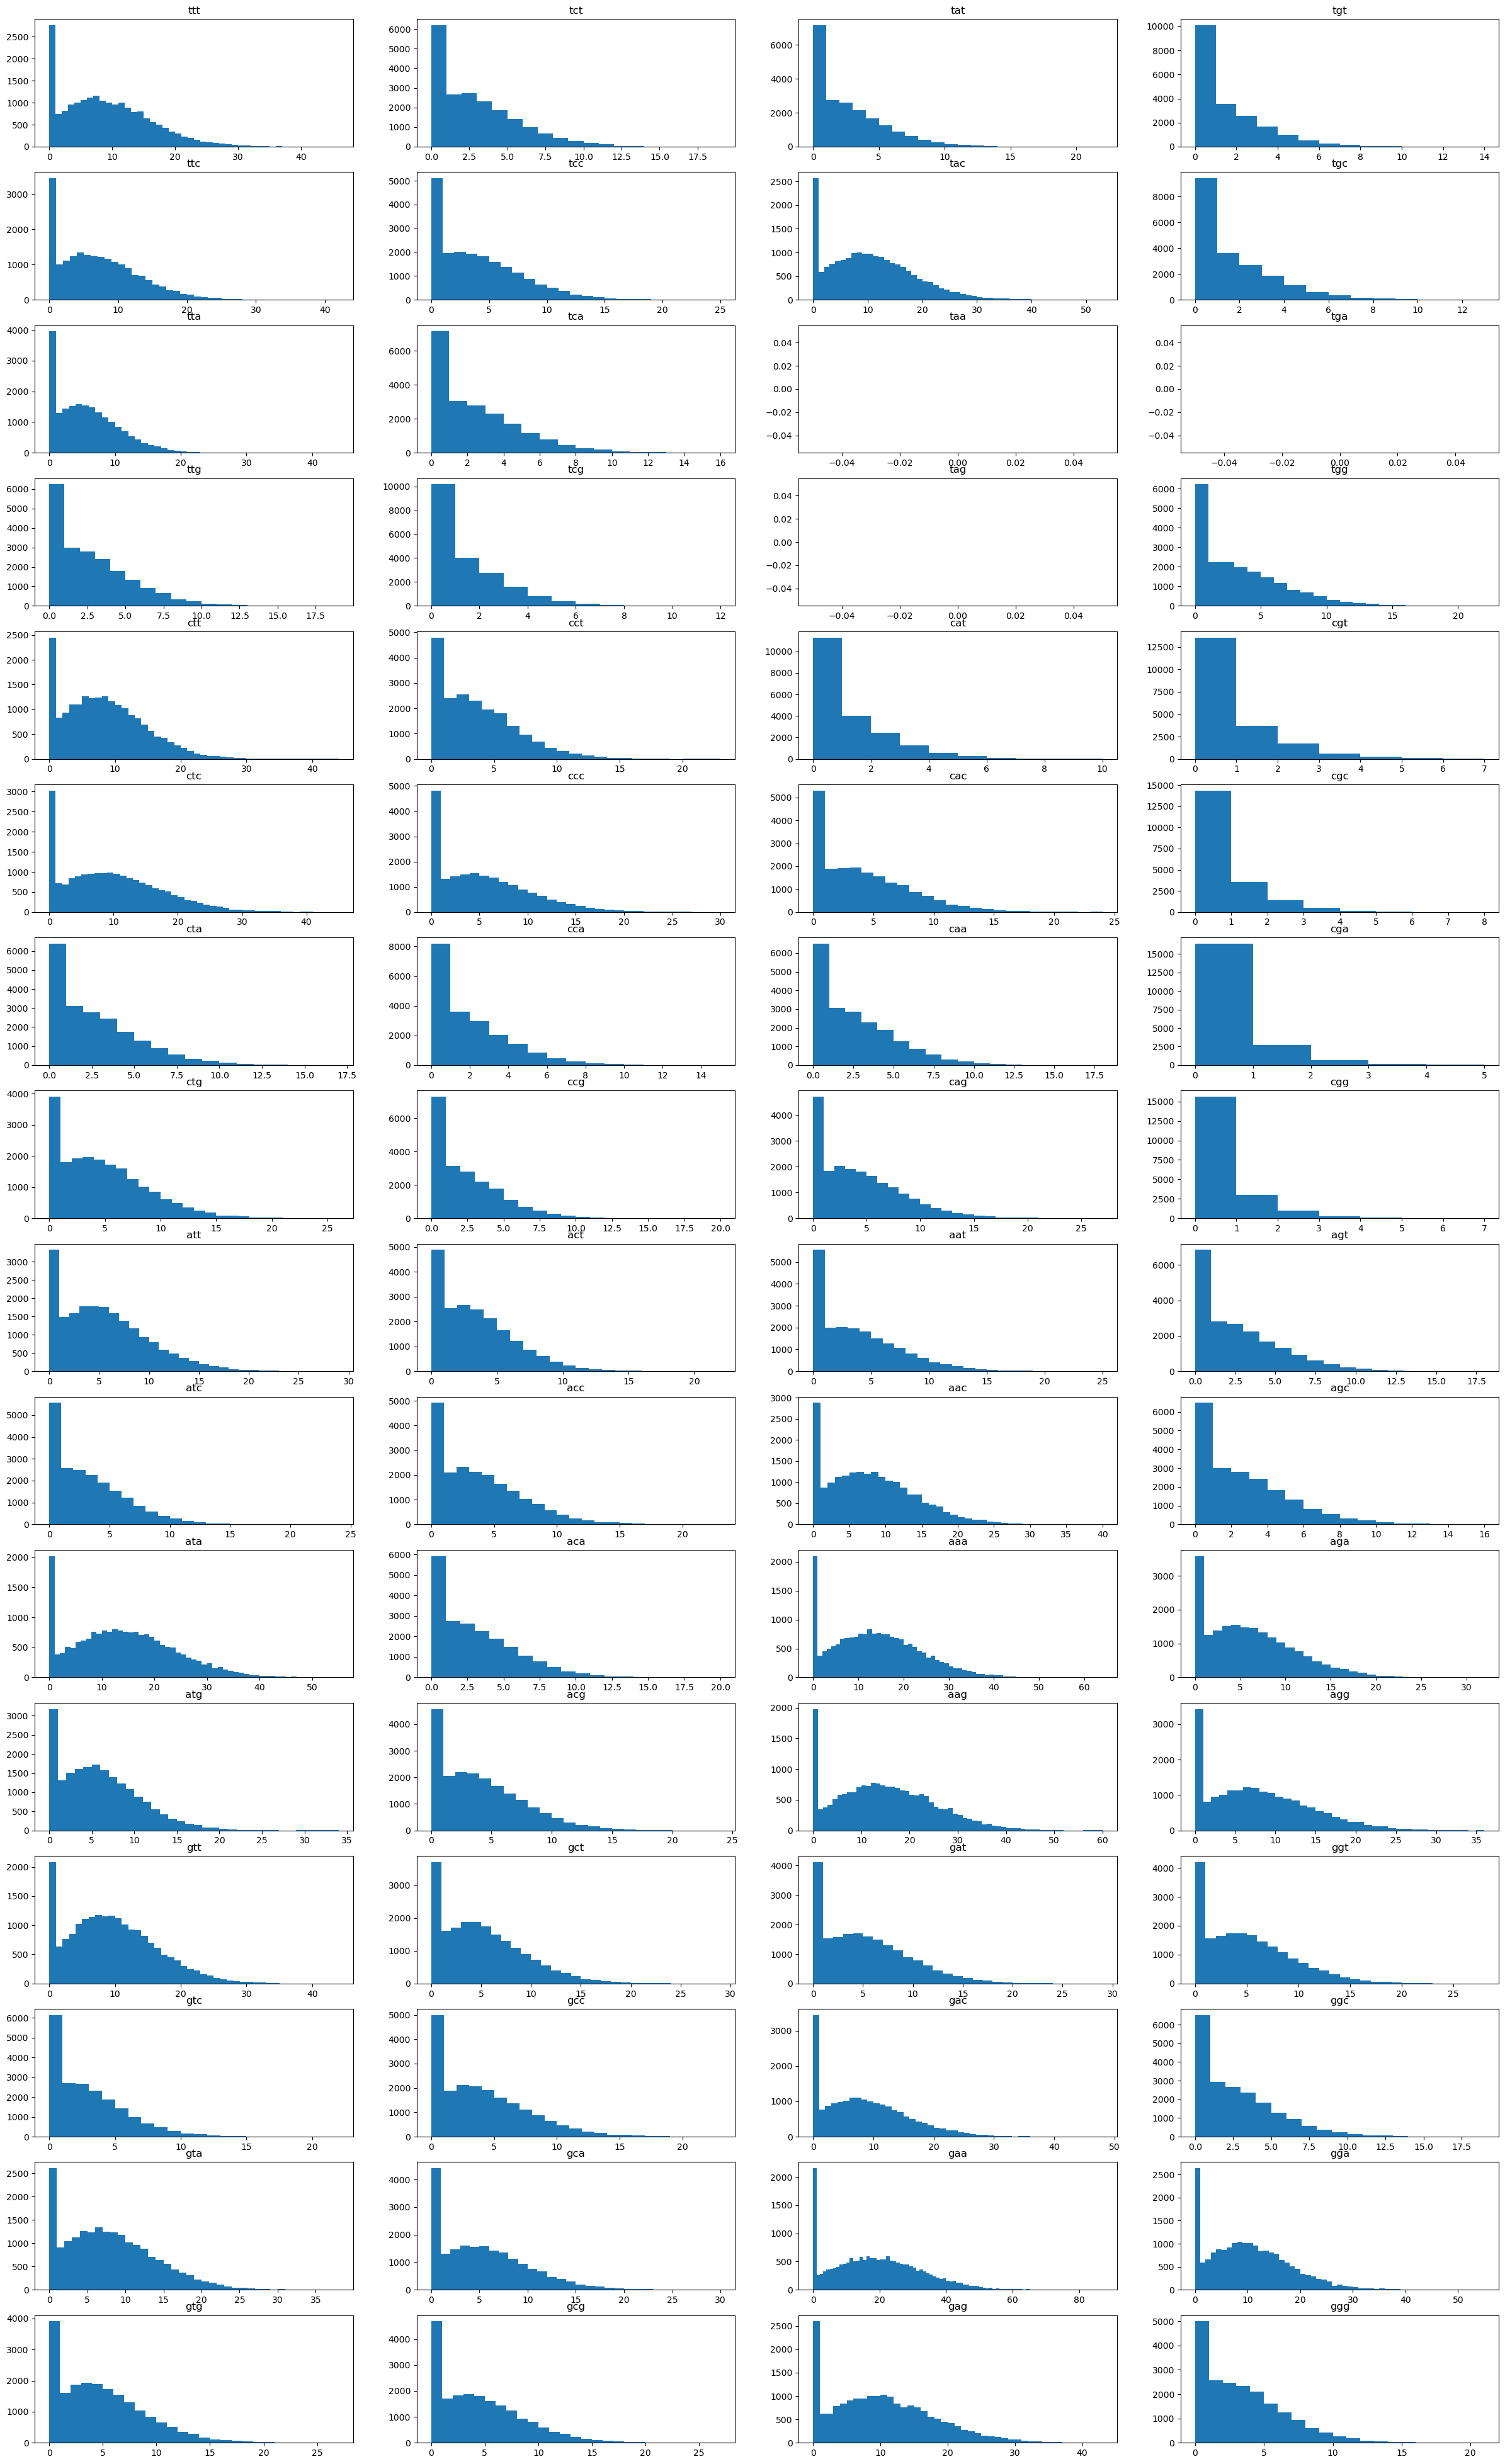

In [175]:
plot_distribution_cub_generated(list_of_random_dnas)

In [171]:
def calculate_mean_cub_generated(random_dnas):
    # calculate cub for each generated sequences
    list_of_cubs = []
    for i in range(len(random_dnas)):
        list_of_cubs.append(calc_cub(random_dnas[i]))
    # calculate cub means of 10 000 random sequences
    mean_cub_gen = {}
    for cds in CODE_COVARMAT:
        mean_cub_gen[cds.upper()] = 0
        
    for i in range(len(random_dnas)):
        curr_cub = list_of_cubs[i]
        for cds in CODE_COVARMAT:
            mean_cub_gen[cds.upper()] += curr_cub[cds.upper()]
    
    for cds in mean_cub_gen:
        mean_cub_gen[cds] = mean_cub_gen[cds]/(len(random_dnas))
    
    return mean_cub_gen
        

In [172]:
mean_cub_gen = calculate_mean_cub_generated(list_of_random_dnas)
mean_cub_gen

{'TTT': 8.7457,
 'TCT': 2.55795,
 'TAT': 2.30955,
 'TGT': 1.2133,
 'TTC': 6.7873,
 'TCC': 3.7127,
 'TAC': 10.15855,
 'TGC': 1.3436,
 'TTA': 5.36735,
 'TCA': 2.07845,
 'TTG': 2.3939,
 'TCG': 1.0618,
 'TGG': 3.01385,
 'CTT': 8.0299,
 'CCT': 3.2305,
 'CAT': 0.86335,
 'CGT': 0.5278,
 'CTC': 9.38365,
 'CCC': 5.01345,
 'CAC': 3.77705,
 'CGC': 0.43775,
 'CTA': 2.30595,
 'CCA': 1.614,
 'CAA': 2.26025,
 'CGA': 0.2408,
 'CTG': 4.3575,
 'CCG': 2.0201,
 'CAG': 4.0028,
 'CGG': 0.30945,
 'ATT': 5.151,
 'ACT': 3.0097,
 'AAT': 3.52515,
 'AGT': 2.3079,
 'ATC': 2.9193,
 'ACC': 3.46725,
 'AAC': 7.60675,
 'AGC': 2.2829,
 'ATA': 13.834,
 'ACA': 2.66475,
 'AAA': 13.6934,
 'AGA': 5.727,
 'ATG': 5.54035,
 'ACG': 3.71135,
 'AAG': 14.61105,
 'AGG': 7.57855,
 'GTT': 9.2046,
 'GCT': 4.7469,
 'GAT': 4.84715,
 'GGT': 4.68405,
 'GTC': 2.56825,
 'GCC': 3.6786,
 'GAC': 8.20075,
 'GGC': 2.3707,
 'GTA': 7.5857,
 'GCA': 4.99225,
 'GAA': 18.7738,
 'GGA': 9.8214,
 'GTG': 4.51075,
 'GCG': 4.17765,
 'GAG': 10.0078,
 'GGG': 3

In [346]:
def calculate_mean_cub_generated_normed(random_dnas):
    # calculate cub for each generated sequences
    list_of_cubs = []
    for i in range(len(random_dnas)):
        list_of_cubs.append(calc_cub(random_dnas[i]))
    # calculate cub means of 10 000 random sequences
    mean_cub_gen = {}
    for cds in CODE_COVARMAT:
        mean_cub_gen[cds.upper()] = 0
        
    for i in range(len(random_dnas)):
        curr_cub = list_of_cubs[i]
        for cds in CODE_COVARMAT:
            mean_cub_gen[cds.upper()] += curr_cub[cds.upper()]
    
    # norm
    total_codon_count = 0
    for cds in mean_cub_gen:
        total_codon_count+=mean_cub_gen[cds.upper()]
    
    for cds in mean_cub_gen:
        mean_cub_gen[cds] = mean_cub_gen[cds]*1000/total_codon_count
    
    return mean_cub_gen

In [347]:
mean_cub_gen_normed = calculate_mean_cub_generated_normed(list_of_random_dnas)
mean_cub_gen_normed

{'TTT': 29.152333333333335,
 'TCT': 8.5265,
 'TAT': 7.6985,
 'TGT': 4.044333333333333,
 'TTC': 22.624333333333333,
 'TCC': 12.375666666666667,
 'TAC': 33.86183333333334,
 'TGC': 4.478666666666666,
 'TTA': 17.891166666666667,
 'TCA': 6.928166666666667,
 'TTG': 7.979666666666667,
 'TCG': 3.5393333333333334,
 'TGG': 10.046166666666666,
 'CTT': 26.766333333333332,
 'CCT': 10.768333333333333,
 'CAT': 2.8778333333333332,
 'CGT': 1.7593333333333334,
 'CTC': 31.278833333333335,
 'CCC': 16.7115,
 'CAC': 12.590166666666667,
 'CGC': 1.4591666666666667,
 'CTA': 7.6865,
 'CCA': 5.38,
 'CAA': 7.534166666666667,
 'CGA': 0.8026666666666666,
 'CTG': 14.525,
 'CCG': 6.733666666666666,
 'CAG': 13.342666666666666,
 'CGG': 1.0315,
 'ATT': 17.17,
 'ACT': 10.032333333333334,
 'AAT': 11.7505,
 'AGT': 7.693,
 'ATC': 9.731,
 'ACC': 11.5575,
 'AAC': 25.355833333333333,
 'AGC': 7.609666666666667,
 'ATA': 46.11333333333334,
 'ACA': 8.8825,
 'AAA': 45.644666666666666,
 'AGA': 19.09,
 'ATG': 18.467833333333335,
 'AC

### Mahalonobis with generated mean

In [381]:
# init covariance matrix
covarmat = np.zeros((61,61))
# fill covariance matrix
for i,i_tag in enumerate(CODE_COVARMAT):
    for j,j_tag in enumerate(CODE_COVARMAT):
        intermediate_sum = 0
        for locust_tag in aquifex_aeolicus_VF5.genes:
            total_codon_count_locust_tag = 0
            
            for tag in aquifex_aeolicus_VF5[locust_tag]['cub']:
                total_codon_count_locust_tag += aquifex_aeolicus_VF5[locust_tag]['cub'][tag]
            
            diff_A = ((aquifex_aeolicus_VF5[locust_tag]['cub'][i_tag.upper()]/total_codon_count_locust_tag)*1000) - ((aquifex_aeolicus_VF5.cub[i_tag.upper()]/491074)*1000)
            diff_B = ((aquifex_aeolicus_VF5[locust_tag]['cub'][j_tag.upper()]/total_codon_count_locust_tag)*1000) - ((aquifex_aeolicus_VF5.cub[j_tag.upper()]/491074)*1000)
            intermediate_sum+=diff_A * diff_B

        covarmat[i][j]= intermediate_sum

In [353]:
covarmat

array([[ 4.26096271e+05,  4.36697686e+04,  4.61977206e+04, ...,
        -4.74075660e+04, -9.39887878e+04,  1.29264999e+04],
       [ 4.36697686e+04,  6.93277047e+04,  1.25604869e+04, ...,
        -1.04420317e+04, -3.77975071e+04,  1.71977899e+03],
       [ 4.61977206e+04,  1.25604869e+04,  8.58728165e+04, ...,
        -1.97545359e+04, -3.33629915e+04,  1.57415559e+03],
       ...,
       [-4.74075660e+04, -1.04420317e+04, -1.97545359e+04, ...,
         1.15314877e+05,  1.65261000e+03,  3.86965620e+03],
       [-9.39887878e+04, -3.77975071e+04, -3.33629915e+04, ...,
         1.65261000e+03,  3.96563480e+05, -1.95969214e+02],
       [ 1.29264999e+04,  1.71977899e+03,  1.57415559e+03, ...,
         3.86965620e+03, -1.95969214e+02,  8.47386585e+04]])

In [364]:
# init zeros
X_1 = np.zeros((1,61))
Xhat_1 = np.zeros((1,61))

for i,cds in enumerate(CODE_COVARMAT):
    X_1[0][i] = aquifex_aeolicus_VF5['aq_132']['cub'][cds.upper()]
    Xhat_1[0][i] = mean_cub_gen[cds.upper()]

In [365]:
X_2 = np.zeros((1,61))
Xhat_2 = np.zeros((1,61))

for i,cds in enumerate(CODE_COVARMAT):
    X_2[0][i] = aquifex_aeolicus_VF5['aq_128']['cub'][cds.upper()]
    Xhat_2[0][i] = mean_cub_gen[cds.upper()]

In [379]:
X_3 = np.zeros((1,61))
Xhat_3 = np.zeros((1,61))

for i,cds in enumerate(CODE_COVARMAT):
    X_3[0][i] = aquifex_aeolicus_VF5['aq_128']['cub'][cds.upper()]
    Xhat_3[0][i] = mean_cub_gen_normed[cds.upper()]

In [366]:
np.matmul(np.matmul(((X_1*1000/np.sum(X_1))-Xhat_1),np.linalg.inv(covarmat)),np.transpose((X_1*1000/np.sum(X_1))-Xhat_1))

array([[69.39171203]])

In [367]:
np.matmul(np.matmul(((X_2*1000/np.sum(X_2))-Xhat_2),np.linalg.inv(covarmat)),np.transpose((X_2*1000/np.sum(X_2))-Xhat_2))

array([[69.38730238]])

In [380]:
np.matmul(np.matmul(((X_3*1000/np.sum(X_3))-Xhat_3),np.linalg.inv(covarmat)),np.transpose((X_3*1000/np.sum(X_3))-Xhat_3))

array([[0.24516935]])

In [374]:
# init covariance matrix
covarmat = np.zeros((61,61))
# fill covariance matrix
for i,i_tag in enumerate(CODE_COVARMAT):
    for j,j_tag in enumerate(CODE_COVARMAT):
        intermediate_sum = 0
        for locust_tag in aquifex_aeolicus_VF5.genes:
            diff_A = aquifex_aeolicus_VF5[locust_tag]['cub'][i_tag.upper()] - mean_cub_gen[i_tag.upper()]
            diff_B = aquifex_aeolicus_VF5[locust_tag]['cub'][j_tag.upper()] - mean_cub_gen[j_tag.upper()]
            intermediate_sum+=diff_A * diff_B

        covarmat[i][j]= intermediate_sum

In [375]:
covarmat

array([[76977.79636497, 16974.2127282 , 16105.88991856, ...,
        13440.89800856, 36812.04536238, 13674.17333649],
       [16974.2127282 ,  9332.23893848,  4831.45849514, ...,
         5235.94212658, 12409.52567153,  4304.28967953],
       [16105.88991856,  4831.45849514, 10911.91892748, ...,
         2900.5392888 ,  9392.76810297,  3638.94423659],
       ...,
       [13440.89800856,  5235.94212658,  2900.5392888 , ...,
        22078.91493844, 27496.57674551,  6714.05188193],
       [36812.04536238, 12409.52567153,  9392.76810297, ...,
        27496.57674551, 99432.24168452, 16315.35757973],
       [13674.17333649,  4304.28967953,  3638.94423659, ...,
         6714.05188193, 16315.35757973, 11305.07295758]])

In [376]:
# init zeros
X = np.zeros((1,61))
Xhat = np.zeros((1,61))

for i,cds in enumerate(CODE_COVARMAT):
    X[0][i] = aquifex_aeolicus_VF5['aq_132']['cub'][cds.upper()]
    Xhat[0][i] = mean_cub_gen_normed[cds.upper()]

In [378]:
np.matmul(np.matmul(((X*1000/np.sum(X))-Xhat),np.linalg.inv(covarmat)),np.transpose((X*1000/np.sum(X))-Xhat))

array([[0.81523718]])

In [193]:
aquifex_aeolicus_VF5['aq_132']

{'gene': 'ribH',
 'protein': 'riboflavin synthase beta subunit',
 'protein_id': 'AAC06489.1',
 'location': '81823..82287',
 'g_count': 139,
 'a_count': 139,
 'c_count': 91,
 't_count': 96,
 'GC1': 56.774193548387096,
 'SD1': 1.2897468675667603,
 'GC2': 43.225806451612904,
 'SD2': 2.336682065621041,
 'GC3': 48.38709677419355,
 'SD3': 0.11007464758007475,
 'GCT': 49.46236559139785,
 'SDT': 1.61812057693877,
 'rel_freq': {'G': 0.2989247311827957,
  'A': 0.2989247311827957,
  'C': 0.1956989247311828,
  'T': 0.2064516129032258},
 '12_symbols': {'A': [0.3032258064516129,
   0.25806451612903225,
   0.33548387096774196],
  'T': [0.12903225806451613, 0.3096774193548387, 0.18064516129032257],
  'G': [0.4258064516129032, 0.2, 0.2709677419354839],
  'C': [0.14193548387096774, 0.23225806451612904, 0.2129032258064516]},
 '48_symbols': {'AA': [0.07096774193548387,
   0.0967741935483871,
   0.12337662337662338],
  'AG': [0.07741935483870968, 0.05161290322580645, 0.14935064935064934],
  'AT': [0.109677

In [297]:
total_codon_count_genome=0
for i in aquifex_aeolicus_VF5.cub:
    total_codon_count_genome+=aquifex_aeolicus_VF5.cub[i]

In [298]:
total_codon_count_genome

491074

In [301]:
for i in aquifex_aeolicus_VF5.cub:
    print(f"cds: {i} norm: {(aquifex_aeolicus_VF5.cub[i]/total_codon_count_genome)*1000}")

cds: TTT norm: 28.90399410272179
cds: TCT norm: 8.876462610523058
cds: TAT norm: 7.656687179528951
cds: TGT norm: 3.862961590310218
cds: TTC norm: 22.448755177427433
cds: TCC norm: 12.776078554352296
cds: TAC norm: 33.67516911911443
cds: TGC norm: 4.029942534119094
cds: TTA norm: 17.575762512370844
cds: TCA norm: 7.131308112422975
cds: TAA norm: 1.6066824959171122
cds: TGA norm: 1.1627575477422956
cds: TTG norm: 8.141339187169347
cds: TCG norm: 3.451618289707865
cds: TAG norm: 0.3950524768161214
cds: TGG norm: 9.346860147350501
cds: CTT norm: 26.885968306202322
cds: CCT norm: 10.843579582710548
cds: CAT norm: 2.6207862766100427
cds: CGT norm: 1.5150466121195583
cds: CTC norm: 30.840565780310094
cds: CCC norm: 17.05445615121143
cds: CAC norm: 12.798478437058366
cds: CGC norm: 1.2401389607268964
cds: CTA norm: 7.746286710353226
cds: CCA norm: 5.599970676517184
cds: CAA norm: 7.310507174071525
cds: CGA norm: 0.5599970676517184
cds: CTG norm: 14.50086952271959
cds: CCG norm: 6.996908816186

In [311]:
aquifex_aeolicus_VF5.mean_cub

{'TTT': 9.139729555698647,
 'TCT': 2.8068254990341277,
 'TAT': 2.4211204121056022,
 'TGT': 1.2215067611075339,
 'TTC': 7.098518995492595,
 'TCC': 4.0399227301996135,
 'TAC': 10.648422408242112,
 'TGC': 1.274307791371539,
 'TTA': 5.557630392788152,
 'TCA': 2.2549903412749517,
 'TAA': 0.5080489375402447,
 'TGA': 0.3676754668383773,
 'TTG': 2.574372182871861,
 'TCG': 1.0914359304571797,
 'TAG': 0.12491951062459755,
 'TGG': 2.9555698647778494,
 'CTT': 8.501609787508048,
 'CCT': 3.428847392144237,
 'CAT': 0.8287186091435931,
 'CGT': 0.47907276239536384,
 'CTC': 9.752092723760464,
 'CCC': 5.3927881519639405,
 'CAC': 4.047005795235029,
 'CGC': 0.3921442369607212,
 'CTA': 2.449452672247263,
 'CCA': 1.7707662588538313,
 'CAA': 2.3116548615582744,
 'CGA': 0.17707662588538314,
 'CTG': 4.585318737926594,
 'CCG': 2.21249195106246,
 'CAG': 4.141661300708306,
 'CGG': 0.24404378622021894,
 'ATT': 5.493882807469414,
 'ACT': 3.077269800386349,
 'AAT': 3.4449452672247265,
 'AGT': 2.4790727623953637,
 'AT